<a href="https://colab.research.google.com/github/Vanu1/Stock-price-prediction/blob/main/stock_prediction_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install twint

     |████████████████████████████████| 1.3MB 7.7MB/s 
     |████████████████████████████████| 266kB 29.9MB/s 
     |████████████████████████████████| 358kB 36.8MB/s 
     |████████████████████████████████| 143kB 44.6MB/s 
     |████████████████████████████████| 296kB 39.7MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 
  Created wheel for twint: filename=twint-2.1.20-cp37-none-any.whl size=33929 sha256=3791bf4ea0e1f2f3cc177258fe57164af46d24326606f9927d70e3251e9a603f
  Stored in directory: /root/.cache/pip/wheels/66/25/c7/855c1d896087ef84df6e6713b8adb073aff99af119450e1e4f
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=a585d08c39ff4b5c6b7c42f59614164858c4a918494a7b0aca165459d0c64dd4
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=15970 sha256=80d5e223780c4ab87053daf20613bbea2ef

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 32.0MB/s 


In [ ]:
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
# import twint
import random
import re
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np

We will be using nifty50 dataset of certain time interval 
from investing.com . time interval is ranging from 03-01-2000 to 31-12-2020 

In [ ]:
#Data is scraped from this url: https://in.investing.com/indices/s-p-cnx-nifty-historical-data?end_date=1577817000&st_date=946665000

url = 'https://in.investing.com/indices/s-p-cnx-nifty-historical-data?end_date=1577817000&st_date=946665000'
req = Request(url , headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
page_soup = soup(webpage, "html.parser")
date_raw = page_soup.find("div", {'class':'common-table-scroller js-table-scroller'}).find_all("td", {"class":"col-rowDate "})
date = [x.text.split("\n")[1] for x in date_raw]
price_raw = []
for i in range(4972):
    price_raw.append(page_soup.find("div", {'class':'common-table-scroller js-table-scroller'}).find_all("td")[i*7:(i+1)*7][1].text)
price = [float(x.split("\n")[1].replace(",", "")) for x in price_raw]
nifty = pd.DataFrame(list(zip(date, price)), columns=['date', 'price'])

In [ ]:
nifty.head()

,date,price
0,"Dec 31, 2019",12168.45
1,"Dec 30, 2019",12255.85
2,"Dec 27, 2019",12245.80
3,"Dec 26, 2019",12126.55
4,"Dec 24, 2019",12214.55


In [ ]:
nifty.tail()

,date,price
4967,"Jan 10, 2000",1632.95
4968,"Jan 07, 2000",1613.30
4969,"Jan 06, 2000",1617.60
4970,"Jan 05, 2000",1595.80
4971,"Jan 04, 2000",1638.70


In [ ]:
nifty.to_csv("nifty50.csv",index=False)

In [ ]:
from datetime import datetime

In [ ]:
!pip install nest_asyncio

In [ ]:
#configuration actually this code worked on kaggle but not in colab because of some environment problem 
import nest_asyncio
nest_asyncio.apply()
config = twint.Config()
config.Username = 'NDTVProfit'
config.Lang = 'en'
config.Since = '2015-01-01'
config.Until = '2020-01-01'
config.Store_csv = True
config.Output = 'NDTVProfit.csv'
#running search
twint.run.Search(config)

CRITICAL:root:twint.get:User:'NoneType' object is not subscriptable
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 343.0 secs


KeyboardInterrupt: ignored

In [ ]:
!cp -r /content/drive/MyDrive/stock_analysis /content/stock_analysis

In [ ]:
%cd stock_analysis

/content/stock_analysis


In [ ]:
%ls

NDTVProfit.csv  nifty50.csv


In [ ]:
tweet_news=pd.read_csv('NDTVProfit.csv')
tweet_news.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1211975842944827392,1211975842944827392,2019-12-31 11:42:13 UTC,2019-12-31,11:42:13,0,420943164,ndtvprofit,NDTV Profit,NaN,Interest Rates On 15-Year Public Provident Fun...,en,[],['https://www.ndtv.com/business/ppf-other-smal...,[],1,5,36,[],[],https://twitter.com/NDTVProfit/status/12119758...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1211958454178336768,1211949299325526016,2019-12-31 10:33:07 UTC,2019-12-31,10:33:07,0,420943164,ndtvprofit,NDTV Profit,NaN,Government Releases Report On Rs 102-Lakh-Cror...,en,[],['https://www.ndtv.com/business/nirmala-sithar...,[],0,1,7,[],[],https://twitter.com/NDTVProfit/status/12119584...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1211955347679612933,1211955105013977088,2019-12-31 10:20:46 UTC,2019-12-31,10:20:46,0,420943164,ndtvprofit,NDTV Profit,NaN,"Sensex Ends 304 Points Lower, Nifty Settles Be...",en,[],['https://www.ndtv.com/business/bse-sensex-tod...,[],0,0,1,[],[],https://twitter.com/NDTVProfit/status/12119553...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1211955105013977088,1211955105013977088,2019-12-31 10:19:48 UTC,2019-12-31,10:19:48,0,420943164,ndtvprofit,NDTV Profit,NaN,"Sensex ends 304 points lower, Nifty gives up 1...",en,[],[],[],1,0,4,"['sensex', 'nifty', 'marketupdates']",[],https://twitter.com/NDTVProfit/status/12119551...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1211951007556493312,1211951007556493312,2019-12-31 10:03:31 UTC,2019-12-31,10:03:31,0,420943164,ndtvprofit,NDTV Profit,NaN,Finance Minister Nirmala Sitharaman releases r...,en,[],[],['https://pbs.twimg.com/media/ENG3AvwU8AAVlnL....,1,6,35,[],[],https://twitter.com/NDTVProfit/status/12119510...,False,NaN,1,https://pbs.twimg.com/media/ENG3AvwU8AAVlnL.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
nifty=pd.read_csv('nifty50.csv')
nifty.head()

,date,price
0,"Dec 31, 2019",12168.45
1,"Dec 30, 2019",12255.85
2,"Dec 27, 2019",12245.80
3,"Dec 26, 2019",12126.55
4,"Dec 24, 2019",12214.55


In [ ]:
#Removing extra columns
tweet_news = tweet_news[['date', 'tweet']]
tweet_news = tweet_news.sort_values('date').reset_index(drop= True)

In [ ]:
tweet_news.drop_duplicates(keep=False,inplace=True)

In [ ]:
tweet_news.shape

(66889, 2)

In [ ]:
tweet_news.to_csv('news.csv')

# Data pre-processinng

In [ ]:

randomlist = random.sample(range(0, len(tweet_news)), 100)

for i in tweet_news.itertuples():
    if i[0] in randomlist:
        print(f"Tweet No. {i[0]}: {i[2]}")
    else:
        pass

Tweet No. 221: Is Europe Ready for Greek Crisis 2.0?   http://t.co/c9XQbZ4F9r
Tweet No. 754: Oil firms will decide on petrol, diesel price revision: Petroleum Minister  http://t.co/bLQshalymk
Tweet No. 1148: Nikkei opens 1.11% higher on ECB stimulus  http://t.co/Z7aH2BbirJ
Tweet No. 1900: Sensex jumps over 100 points; IT stocks lead  http://t.co/ESFiALoJGo
Tweet No. 3839: BSE, S&amp;P to launch AllCap Index for Indian markets  http://t.co/wCo1bszNML
Tweet No. 4390: Selective capitalisation may impact growth in smaller banks: S&amp;P  http://t.co/DdD8buyQTH
Tweet No. 4452: US monetary policy making emerging economies vulnerable: IMF   http://t.co/B0cAttq9H3
Tweet No. 4875: Asia up on Wall Street rally and China hopes  http://t.co/k5sZuxzfhv
Tweet No. 5357: PM Modi shows his concerns over recent destruction of crops due to unseasonal rainfall
Tweet No. 5640: Exit from  MCX Stock Exchange complete: Financial Technologies   http://t.co/OHECaXzAom
Tweet No. 6891: Gold gains by Rs 130 on glo

Remove all the links starting with either http or pic.twitter.com or https

Remove all the special characters, emoticons

Remove all the hashtags (#), @ symbol.

Remove words: ETMarkets, ndtv, moneycontrol, marketsupdate, 
biznews, NewsAlert, Click here for LIVE updates.
Remove all the numbers.







In [ ]:

#Cleaning the tweets

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def clean(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'pic.twitter\S+', ' ', text)
    text = decontracted(text)
    text = re.sub(r'\(([^)]+)\)', " ", text)
    text = text.replace('etmarkets', ' ').replace('marketupdates', ' ').replace('newsalert', ' ').replace('ndtv', ' ').replace('moneycontrol', ' ').replace('here is why', ' ')
    text = text.replace('marketsupdate', ' ').replace('biznews', ' ').replace('click here', ' ').replace('live updates', ' ').replace('et now', ' ')
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r' \w{1,2}_', ' ', text)
    text = re.sub('\s+',' ', text)
    return text

In [ ]:
for i in tweet_news.itertuples():
    tweet_news.at[i[0], 'tweet_processed'] = clean(i[2])

In [ ]:
#Combining all the tweets posted on a single date
tweet_news['tweet_news_combined'] = tweet_news.groupby(['date'])['tweet_processed'].transform(lambda x: ' '.join(x))

tweet_news.head()

,date,tweet,tweet_processed,tweet_news_combined
0,2015-01-01,US stocks post sixth straight year of gains h...,us stocks post sixth straight year of gains,us stocks post sixth straight year of gains s...
1,2015-01-01,Snapdeal gets 65% of orders through mobiles: K...,snapdeal gets of orders through mobiles kunal ...,us stocks post sixth straight year of gains s...
2,2015-01-01,Meeting fiscal deficit target of 4.1% looks ch...,meeting fiscal deficit target of looks challen...,us stocks post sixth straight year of gains s...
3,2015-01-01,"Sensex starts 2015 on a positive note, ends 8 ...",sensex starts on a positive note ends points h...,us stocks post sixth straight year of gains s...
4,2015-01-01,Mahindra &amp; Mahindra sales down 8% in Decem...,mahindra amp mahindra sales down in december,us stocks post sixth straight year of gains s...


In [ ]:
tweet_news = tweet_news[['date', 'tweet_news_combined']]
tweet_news.drop_duplicates(inplace =True)
tweet_news.isna().sum()
tweet_news.sort_values('date', inplace = True)
tweet_news.head()

,date,tweet_news_combined
0,2015-01-01,us stocks post sixth straight year of gains s...
36,2015-01-02,ashiana housing to enter chennai kolkata eyes ...
81,2015-01-03,ing vysya bank staff concerned over merger wit...
116,2015-01-04,norms tightened for appointment of agents by i...
132,2015-01-05,indian start ups may create lakh jobs in years...


In [ ]:
tweet_news.reset_index(drop = True)
tweet_news.to_csv('news_processed.csv', index =False)

In [ ]:
#Converting date to proper format

month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

for i in tqdm(nifty.itertuples()):
    date_list = i[1].split()
    month = month_dict[date_list[0]]
    year = date_list[2]
    date = date_list[1][:-1]
    nifty.at[i[0], 'date'] = str(year) + '-' + str(month) + '-' + str(date)

nifty['date'] = pd.to_datetime(nifty.date)

4972it [00:00, 58798.38it/s]


In [ ]:
#Reversing Data
nifty = nifty.iloc[::-1].reset_index(drop = True)

In [ ]:
nifty.head()

,date,price
0,2000-01-04,1638.70
1,2000-01-05,1595.80
2,2000-01-06,1617.60
3,2000-01-07,1613.30
4,2000-01-10,1632.95


In [ ]:
tweet_news=pd.read_csv('news_processed.csv')

In [ ]:

# analysing all tweet data to predict sentiment using vader sentiment
#Adding some new words to Vader Dictionary to judge stock market news better.

new_words =  {'falls': -9, 'drops': -9, 'rise': 9, 'increases': 9, 'gain': 9, 'hiked': -9, 'dips': -9, 'declines': -9, 'decline': -9, 'hikes': -9, 'jumps': 9,
              'lose': -9, 'profit': 9, 'loss': -9, 'shreds': -9, 'sell': -9, 'buy': 9, 'recession': -9, 'rupee weakens': -9, 'record low': -9, 'record high': 9,
              'sensex up': 9, 'nifty down': -9, 'sensex down': -9, 'nifty up': 9} 

analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update(new_words)

for i in tqdm(tweet_news.itertuples()):
    score = analyser.polarity_scores(tweet_news.iloc[i[0]]['tweet_news_combined'])

    tweet_news.at[i[0], 'score'] = score['compound']

    if score['compound'] >= 0:
        tweet_news.at[i[0], 'sentiment'] = 1
    else:
        tweet_news.at[i[0], 'sentiment'] = -1

1819it [00:52, 34.37it/s] 


In [ ]:
tweet_news.head()

,date,tweet_news_combined,score,sentiment
0,2015-01-01,us stocks post sixth straight year of gains s...,0.9805,1.0
1,2015-01-02,ashiana housing to enter chennai kolkata eyes ...,0.9981,1.0
2,2015-01-03,ing vysya bank staff concerned over merger wit...,0.9459,1.0
3,2015-01-04,norms tightened for appointment of agents by i...,0.9648,1.0
4,2015-01-05,indian start ups may create lakh jobs in years...,0.9826,1.0


In [ ]:
#Here Positive Sentiment signifies positive news and Negative Sentiment signifies negative news. Positive news should rise the index prices and vice versa.
tweet_news.to_csv('news_combined_with_sentiments.csv', index =False)
tweet_news[['date', 'sentiment']].to_csv('sentiments_final.csv', index =False)

In [ ]:
nifty.shape

(4972, 2)

Since it is a time-series data we cannot split it randomly. Hence, we are considering the latest 20% data as a test set and the first 80% data as a train set. Train Data Shape: (3977, 2), Test Data Shape: (995, 2)

In [ ]:
%cd /content/drive/MyDrive/stock_analysis/

/content/drive/MyDrive/stock_analysis


In [ ]:
nifty=pd.read_csv('data/nifty50.csv')

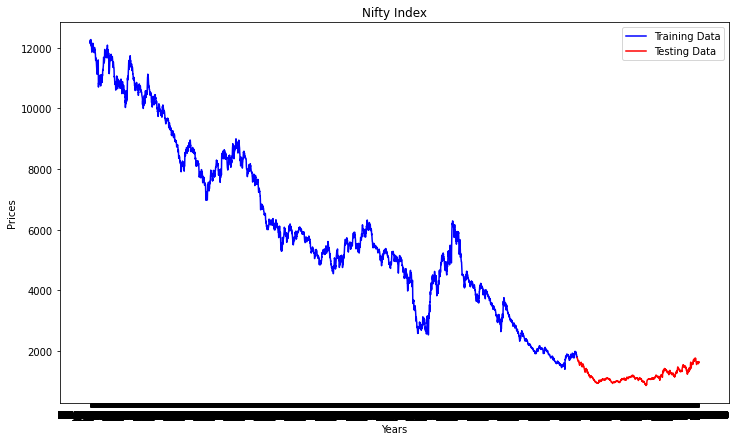

In [ ]:
#Splitting in 80:20 Ratio
train_data, test_data = nifty[0:int(len(nifty)*0.8)], nifty[int(len(nifty)*0.8):]

train_data = train_data.set_index('date', drop= False)
test_data = test_data.set_index('date', drop= False)

plt.figure(figsize=(12,7))
plt.title('Nifty Index')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.plot(train_data['price'], 'blue', label='Training Data')
plt.plot(test_data['price'], 'red', label='Testing Data')
plt.legend()

In [ ]:
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (3977, 2)
Test Data Shape: (995, 2)


In [ ]:
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

In [ ]:
tweet_news=pd.read_csv('data/news_combined_with_sentiments.csv')

In [ ]:
print(f"No. of rows: {tweet_news.shape[0]}")
print(f"No. of columns: {tweet_news.shape[1]}")

No. of rows: 1819
No. of columns: 4


In [ ]:
print(tweet_news.duplicated().sum())
print(tweet_news.isna().sum())

0
date                   0
tweet_news_combined    0
score                  0
sentiment              0
dtype: int64


In [ ]:
tweet_news['sentiment'].value_counts()
#around 37% of the data has negative segment which reflect that trend is positive

 1.0    1349
-1.0     470
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability Distribution of Sentiment Scores by VADER')

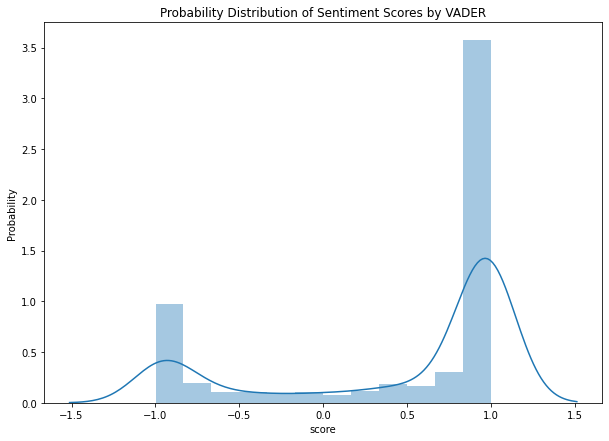

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(tweet_news['score'])
plt.ylabel('Probability')
plt.title('Probability Distribution of Sentiment Scores by VADER')

In [ ]:
!cp -r /content/stock_analysis /content/drive/MyDrive/stock_analysis

In [ ]:
tweet_news.set_index('date', inplace = True)
tweet_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 2015-01-01 to 2019-12-31
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_news_combined  1819 non-null   object 
 1   score                1819 non-null   float64
 2   sentiment            1819 non-null   float64
dtypes: float64(2), object(1)
memory usage: 56.8+ KB


In [ ]:
tweet_news.reset_index(inplace = True)


In [ ]:
tweet_news['date'] = pd.to_datetime(tweet_news['date'])
tweet_news['date'] = tweet_news['date'].dt.date
tweet_news.set_index('date', inplace = True)

In [ ]:
tweet_news.head()

,tweet_news_combined,score,sentiment
date,,,
2015-01-01,us stocks post sixth straight year of gains s...,0.9805,1.0
2015-01-02,ashiana housing to enter chennai kolkata eyes ...,0.9981,1.0
2015-01-03,ing vysya bank staff concerned over merger wit...,0.9459,1.0
2015-01-04,norms tightened for appointment of agents by i...,0.9648,1.0
2015-01-05,indian start ups may create lakh jobs in years...,0.9826,1.0


In [ ]:
train_data.isna().sum()

date     0
price    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability Distribution of Nifty Index Closing Prices')

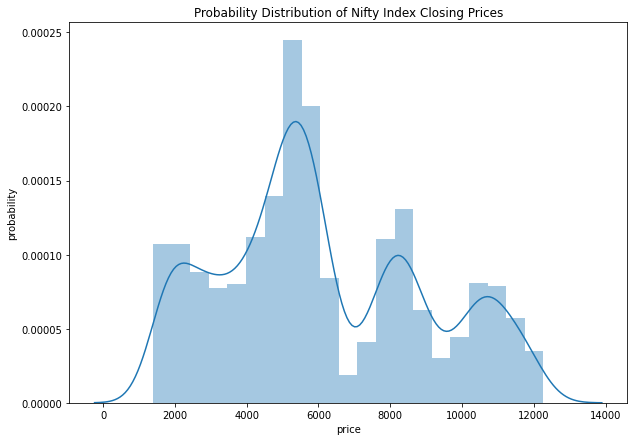

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(train_data['price'])
plt.ylabel('probability')
plt.title('Probability Distribution of Nifty Index Closing Prices')

Following are the 3 qualities of a stationary time series:

Constant mean
Constant variance
Autocovariance that does not depend on time. Autocovariance is covariance between time series and lagged time series.

In [ ]:
train_data.head()

,date,price
date,,
"Dec 31, 2019","Dec 31, 2019",12168.45
"Dec 30, 2019","Dec 30, 2019",12255.85
"Dec 27, 2019","Dec 27, 2019",12245.80
"Dec 26, 2019","Dec 26, 2019",12126.55
"Dec 24, 2019","Dec 24, 2019",12214.55


Text(0.5, 0, 'Years')

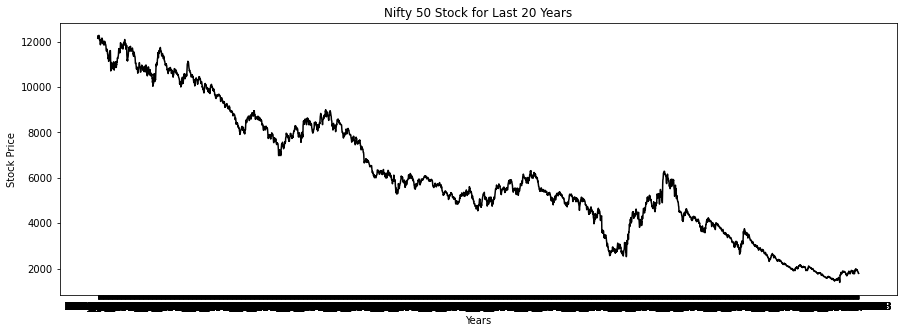

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train_data.price, color='black')
plt.title("Nifty 50 Stock for Last 20 Years")
plt.ylabel("Stock Price")
plt.xlabel("Years")

Trend: This timeseries shows an upward trend. This is a non-stationary time series. We need to convert it to stationary to forecast accurately. Let's also check for the seasonality.

In [ ]:
season = train_data
season['Date'] = train_data.date
season['Year'] = train_data['date'].dt.year
season['Month'] = train_data['date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'price')
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'upper right')
plt.ylabel('price')
plt.title('Nifty Index Distribution over each year')
plt.show()

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


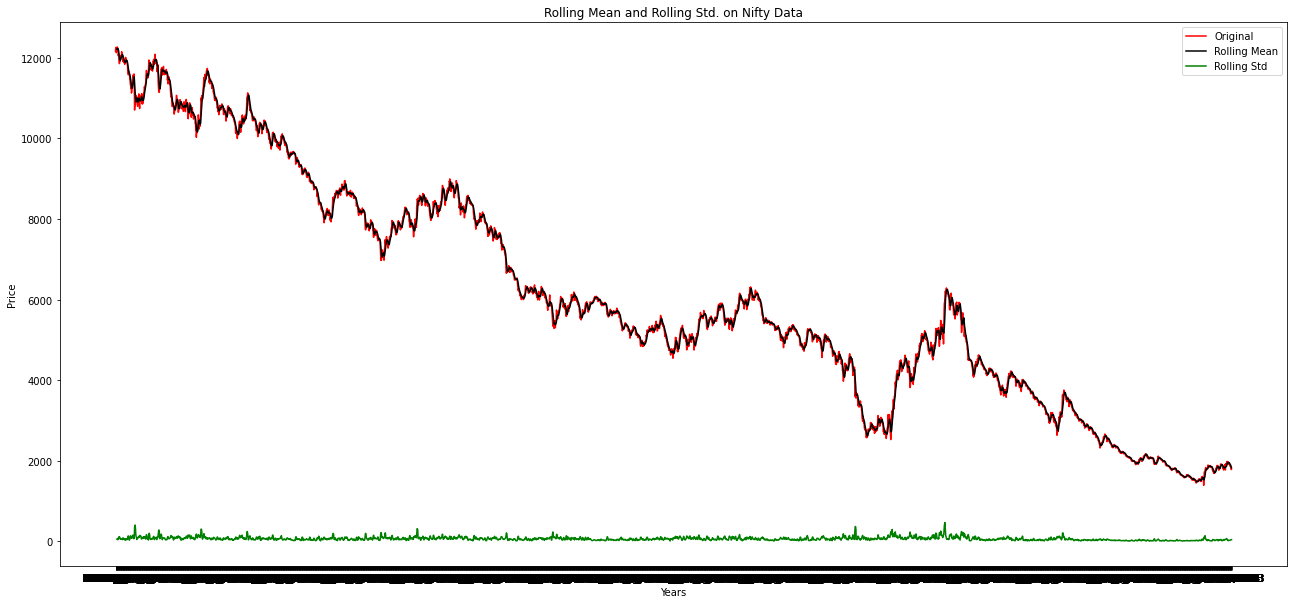

Test statistic:  -1.5656629590076065
p-value:  0.5008154434589498
Critical Values: {'1%': -3.431998245151502, '5%': -2.8622683045438806, '10%': -2.567157684523092}


In [ ]:
ts = train_data['price']
date = train_data['date']

# adfuller library 
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def check_adfuller(ts):

    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

# check_mean_std
def check_mean_std(ts):
    
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Years")
    plt.ylabel("Price")
    plt.title('Rolling Mean and Rolling Std. on Nifty Data')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std) and adfuller test
check_mean_std(ts)
check_adfuller(ts)

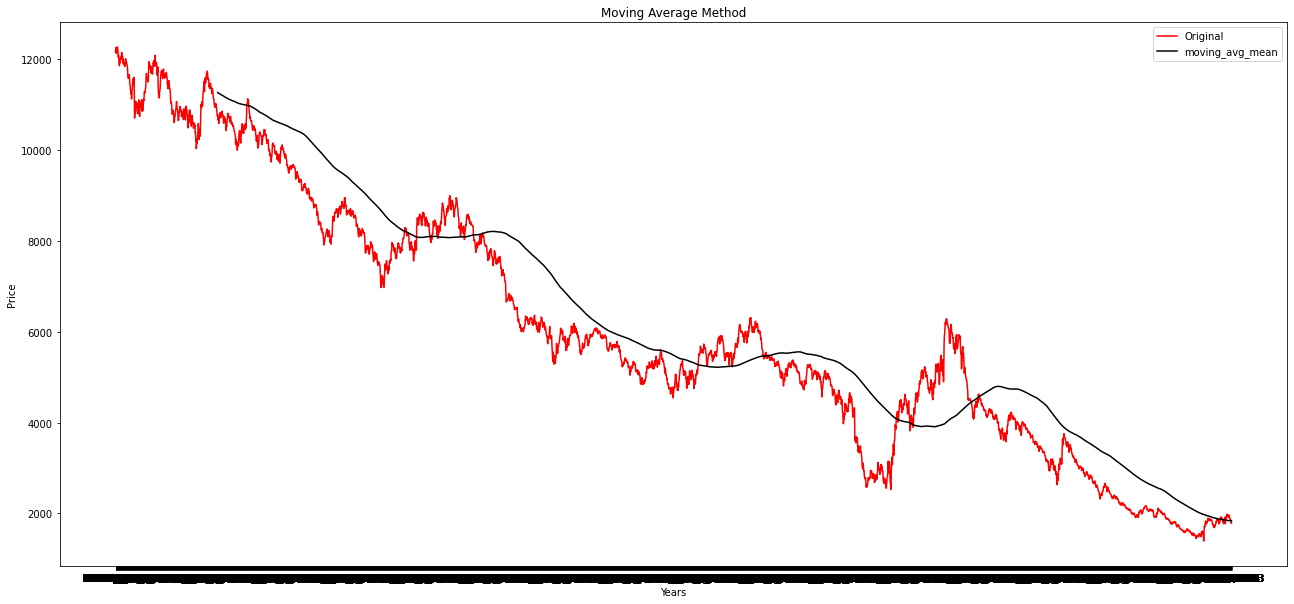

In [ ]:
# Moving average method
window_size = 365
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Moving Average Method")
plt.xlabel("Years")
plt.ylabel("Price")
plt.legend()
plt.show()

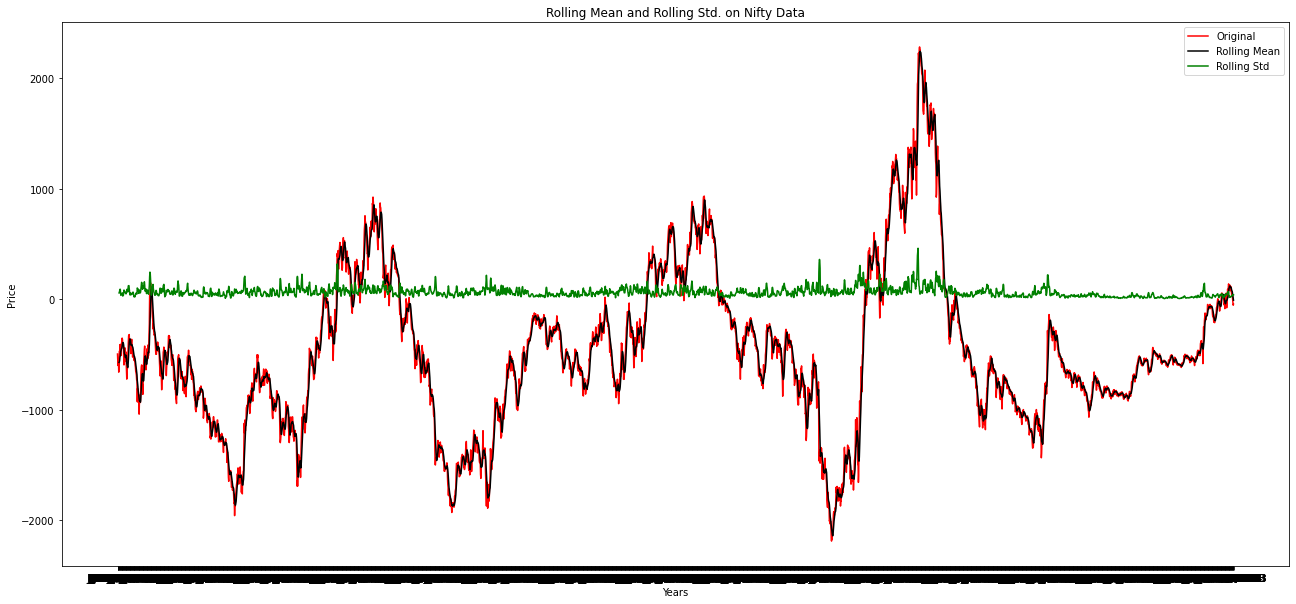

Test statistic:  -3.086886029133991
p-value:  0.02753902603387817
Critical Values: {'1%': -3.432162227822101, '5%': -2.862340740957934, '10%': -2.56719624699553}


In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 3 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff)

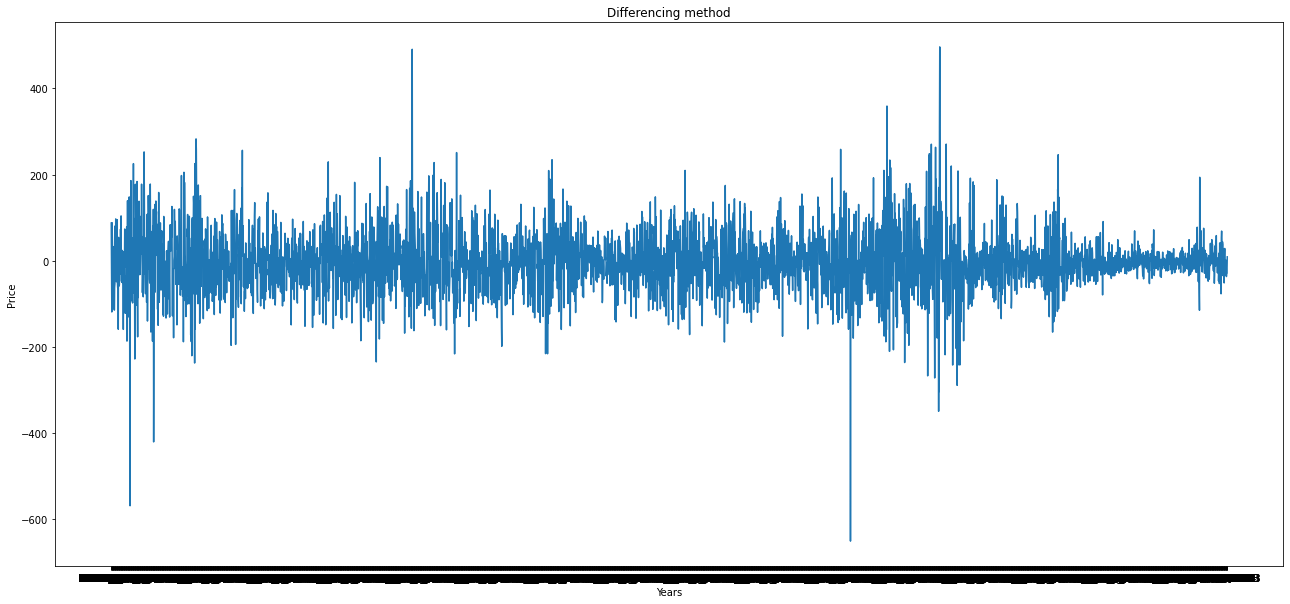

In [ ]:
# differencing method

#shifting by 1 period
ts_diff = ts - ts.shift(1)
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Years")
plt.ylabel("Price")
plt.show()

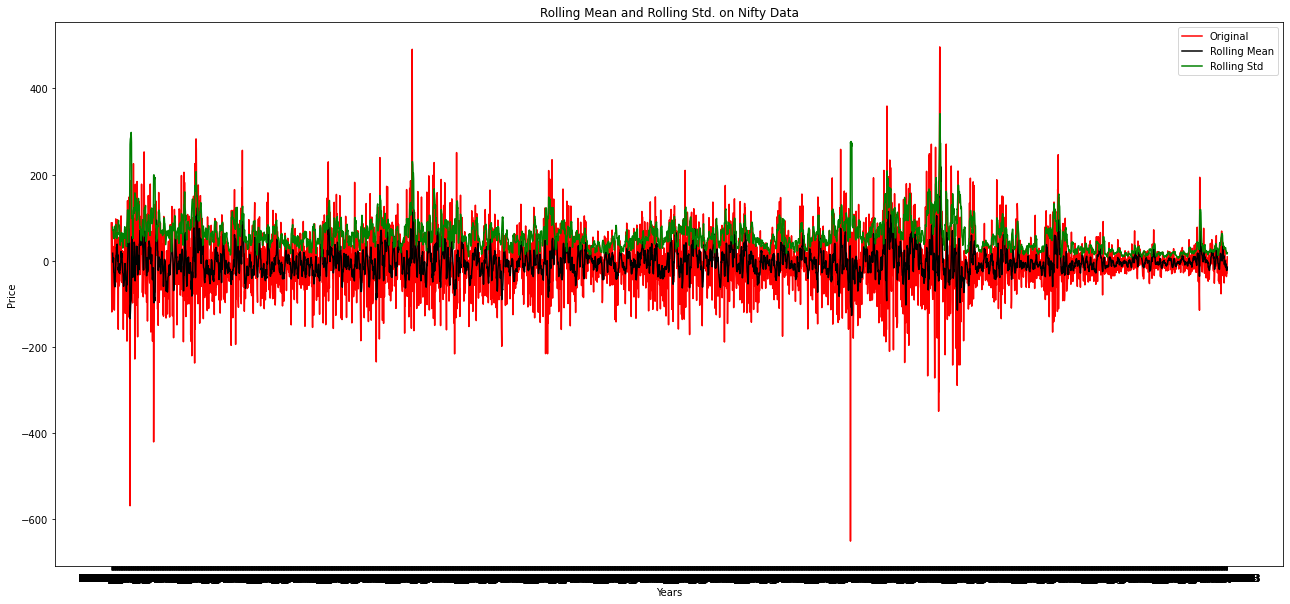

Test statistic:  -27.818689019141175
p-value:  0.0
Critical Values: {'1%': -3.431998245151502, '5%': -2.8622683045438806, '10%': -2.567157684523092}


In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff)